## **About The Dataset**

On April 15, 1912, the largest passenger liner ever made collided with an

icebarg during her madien voyage. When the Titanic sank it killed 1502

 out of 2224 passengers and crew. This sensational tragedy shocked the
 
  international community and led to better safety regulations for ships.
  
   One of the reasons that the shipwreck resulted in such loss of life was

   that there were not enough lifeboats for the passengers and crew.

   Although there was some element of luck involved surving the sinking,

some groups of people were more likely to survive than others.



The **Titanic.csv** file contains data of **891** of the real Titanic passengers.

 Each row represents one person. The columns describe different attributes 

 about the person including whether they **survived (S)**,their** age (A)**, their 
 
 **passenger-class (C)**, their **sex (G)**, and the fare they **paid (X)**

## Import Libraies

In [29]:
## Data wrangling
import numpy as np
import pandas as pd

## Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Data preprocessing
from sklearn.preprocessing import StandardScaler

## Training and Testing Data Seperation
from sklearn.model_selection import train_test_split

## Model Evaluation
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score



## Data Collection and Processing

In [30]:
# Data loading
df= pd.read_csv('/content/Titanic_data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [33]:
# Numbers of rows and columns
df.shape

(891, 12)

In [34]:
# Infromation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# Statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [36]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
# Finding the number of people  survived and not survived 
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [39]:
# Missing Value checking
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

## Handling the missing values

In [40]:
## Droping the 'Cabin' columns from the dataframe
df.drop(columns=['Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
# Replacing the missing value in 'Age' column with mean value

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [42]:
# Finding the mode value of 'Embraked' column
print(df['Embarked'].mode()[0])

S


In [43]:
# Replacing the missing values in 'Embarked' column with the mode value ='S'

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [44]:
# Checking missing value
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

===> Missing values are filled.

## Exploratory Data Analysis

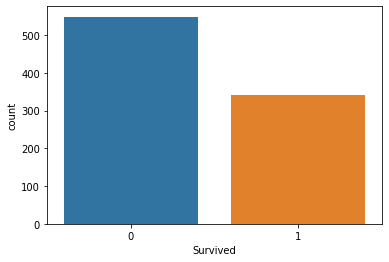

In [46]:
# Count plot of 'Survived' column

sns.countplot(x='Survived',data=df);

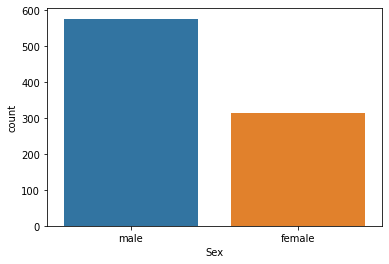

In [47]:
# count plot for 'Sex' column

sns.countplot(x='Sex',data=df);

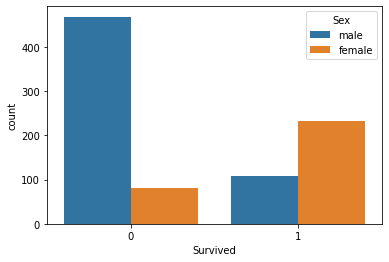

In [49]:
# Number of survivors in gender wise ( 1===> survived 0 ===> not survived)
sns.countplot(x='Survived',hue='Sex',data=df);

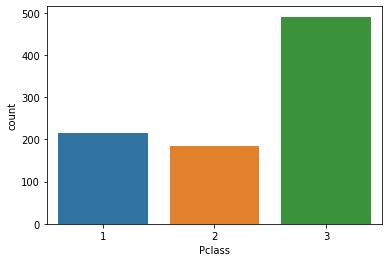

In [51]:
# count plot of 'Pclass' column
sns.countplot(x='Pclass',data=df);

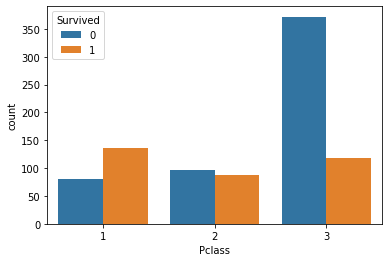

In [53]:
sns.countplot(x='Pclass',hue='Survived',data=df);

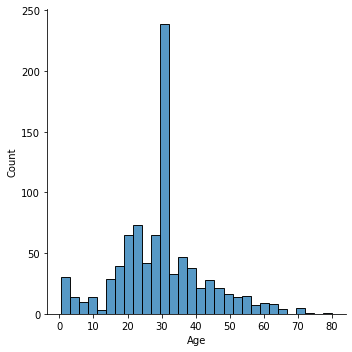

In [56]:
# Analysing  different ages in dataset
sns.displot(df['Age']);

<ipython-input-59-1cc35a70a88c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare']);


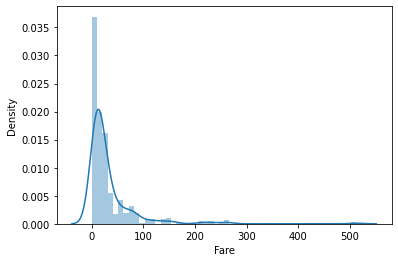

In [59]:
# Analysing the Fare  for passengers

sns.distplot(df['Fare']);

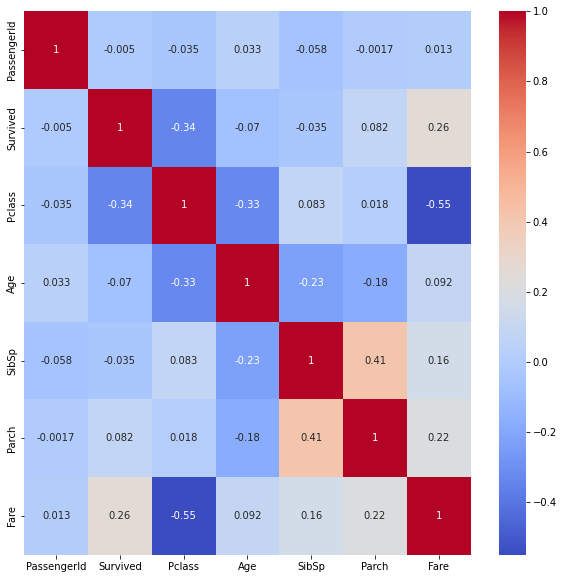

In [61]:
# Heat map

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

## Encoding the categorical columns

In [63]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [64]:
# Converting male and female to 0 and 1

df.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [67]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [68]:
# Converting 'Embarked' colum
df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [71]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [72]:
# Input and Output data seperation

x=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']

In [73]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [74]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [75]:
# Training and Testing data seperation

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [77]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


In [78]:
# Normalising the input data

scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [79]:
x_train

array([[-1.61413602, -0.7243102 ,  1.22920747, ..., -0.47934164,
        -0.07868358, -0.54803535],
       [-0.40055118, -0.7243102 , -0.50350514, ..., -0.47934164,
        -0.37714494, -0.54803535],
       [ 0.81303367, -0.7243102 ,  0.18957991, ..., -0.47934164,
        -0.47486697, -0.54803535],
       ...,
       [ 0.81303367, -0.7243102 ,  0.88266495, ..., -0.47934164,
        -0.35580399, -0.54803535],
       [-1.61413602,  1.38062393, -1.19659018, ...,  2.04874166,
         1.68320121, -0.54803535],
       [-1.61413602, -0.7243102 , -0.65752403, ...,  0.78470001,
         0.86074761, -0.54803535]])

In [80]:
x_test

array([[ 0.81303367, -0.7243102 ,  0.01239022, ...,  0.78470001,
        -0.33390078,  1.04462249],
       [-0.40055118, -0.7243102 ,  0.11257046, ..., -0.47934164,
        -0.42528387, -0.54803535],
       [ 0.81303367, -0.7243102 , -0.73453348, ..., -0.47934164,
        -0.47486697, -0.54803535],
       ...,
       [ 0.81303367,  1.38062393,  0.6516366 , ...,  5.8408666 ,
        -0.02308312, -0.54803535],
       [-0.40055118,  1.38062393, -0.96556183, ..., -0.47934164,
        -0.42528387, -0.54803535],
       [ 0.81303367,  1.38062393, -1.96668467, ...,  0.78470001,
        -0.30589933, -0.54803535]])

## Model creating and performance evaluating

In [85]:
## K-nearest neighbors(KNN)
 
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)
print(y_pred1)

score=accuracy_score(y_test,y_pred1)
print('Accuracy of this model is {}'.format(score))

report=classification_report(y_test,y_pred1)
print(report)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
Accuracy of this model is 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [87]:
## Gaussian naive bayes

gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_pred2=gaussian.predict(x_test)
print(y_pred2)

score=accuracy_score(y_test,y_pred2)
print('Accuracy of this model is {}'.format(score))

report=classification_report(y_test,y_pred2)
print(report)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1]
Accuracy of this model is 0.770949720670391
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [88]:
## Super Vector Machine

vector=SVC(kernel='poly')
vector.fit(x_train,y_train)
y_pred3=vector.predict(x_test)
print(y_pred3)

score= accuracy_score(y_test,y_pred3)
print('Accuracy of this model is {}'.format(score))

report= classification_report(y_test,y_pred3)
print(report)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0]
Accuracy of this model is 0.8044692737430168
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [89]:
## Decision Tree

clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)
y_pred4= clf.predict(x_test)
print(y_pred4)

score= accuracy_score(y_test,y_pred4)
print('Accuracy of this model is {}'.format(score))

report=classification_report(y_test,y_pred4)
print(report)

[0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1]
Accuracy of this model is 0.7877094972067039
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [90]:
## Random Forest

random=RandomForestClassifier(n_estimators=25,criterion='entropy')
random.fit(x_train,y_train)
y_pred5=random.predict(x_test)
print(y_pred5)

score= accuracy_score(y_test,y_pred5)
print('Accuracy score of this model is {}'.format(score))

report= classification_report(y_test,y_pred5)
print(report)

[0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
Accuracy score of this model is 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



## We can see that in these five models, **Random Forest model** has more accuracy than others.